# Dataset 1: analysis

In [2]:
import numpy as np
import scipy
from scipy import signal as sig
from matplotlib import pyplot as plt
import os

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,5)

In [3]:
PATH = "../data/dataset/1"

In [4]:
#files = [file for file in os.listdir(PATH) if file.endswith(".nfc") and not "-3" in file]  # Taking only the first 2 recordings for each tag

all_files = [file for file in os.listdir(PATH) if file.endswith(".nfc")]
all_files.sort()

In [5]:
# RF constants
SAMP_RATE = 768000
CENTER_FREQ = int(13.56e6)
NFFT = 1024

In [6]:
# Read all signals with their filename
signals = []

for file in all_files:
    signal = np.fromfile(os.path.join(PATH, file), dtype=scipy.complex64)
    name = file[:-4]
    signals.append((name, signal))

## Waterfall plots

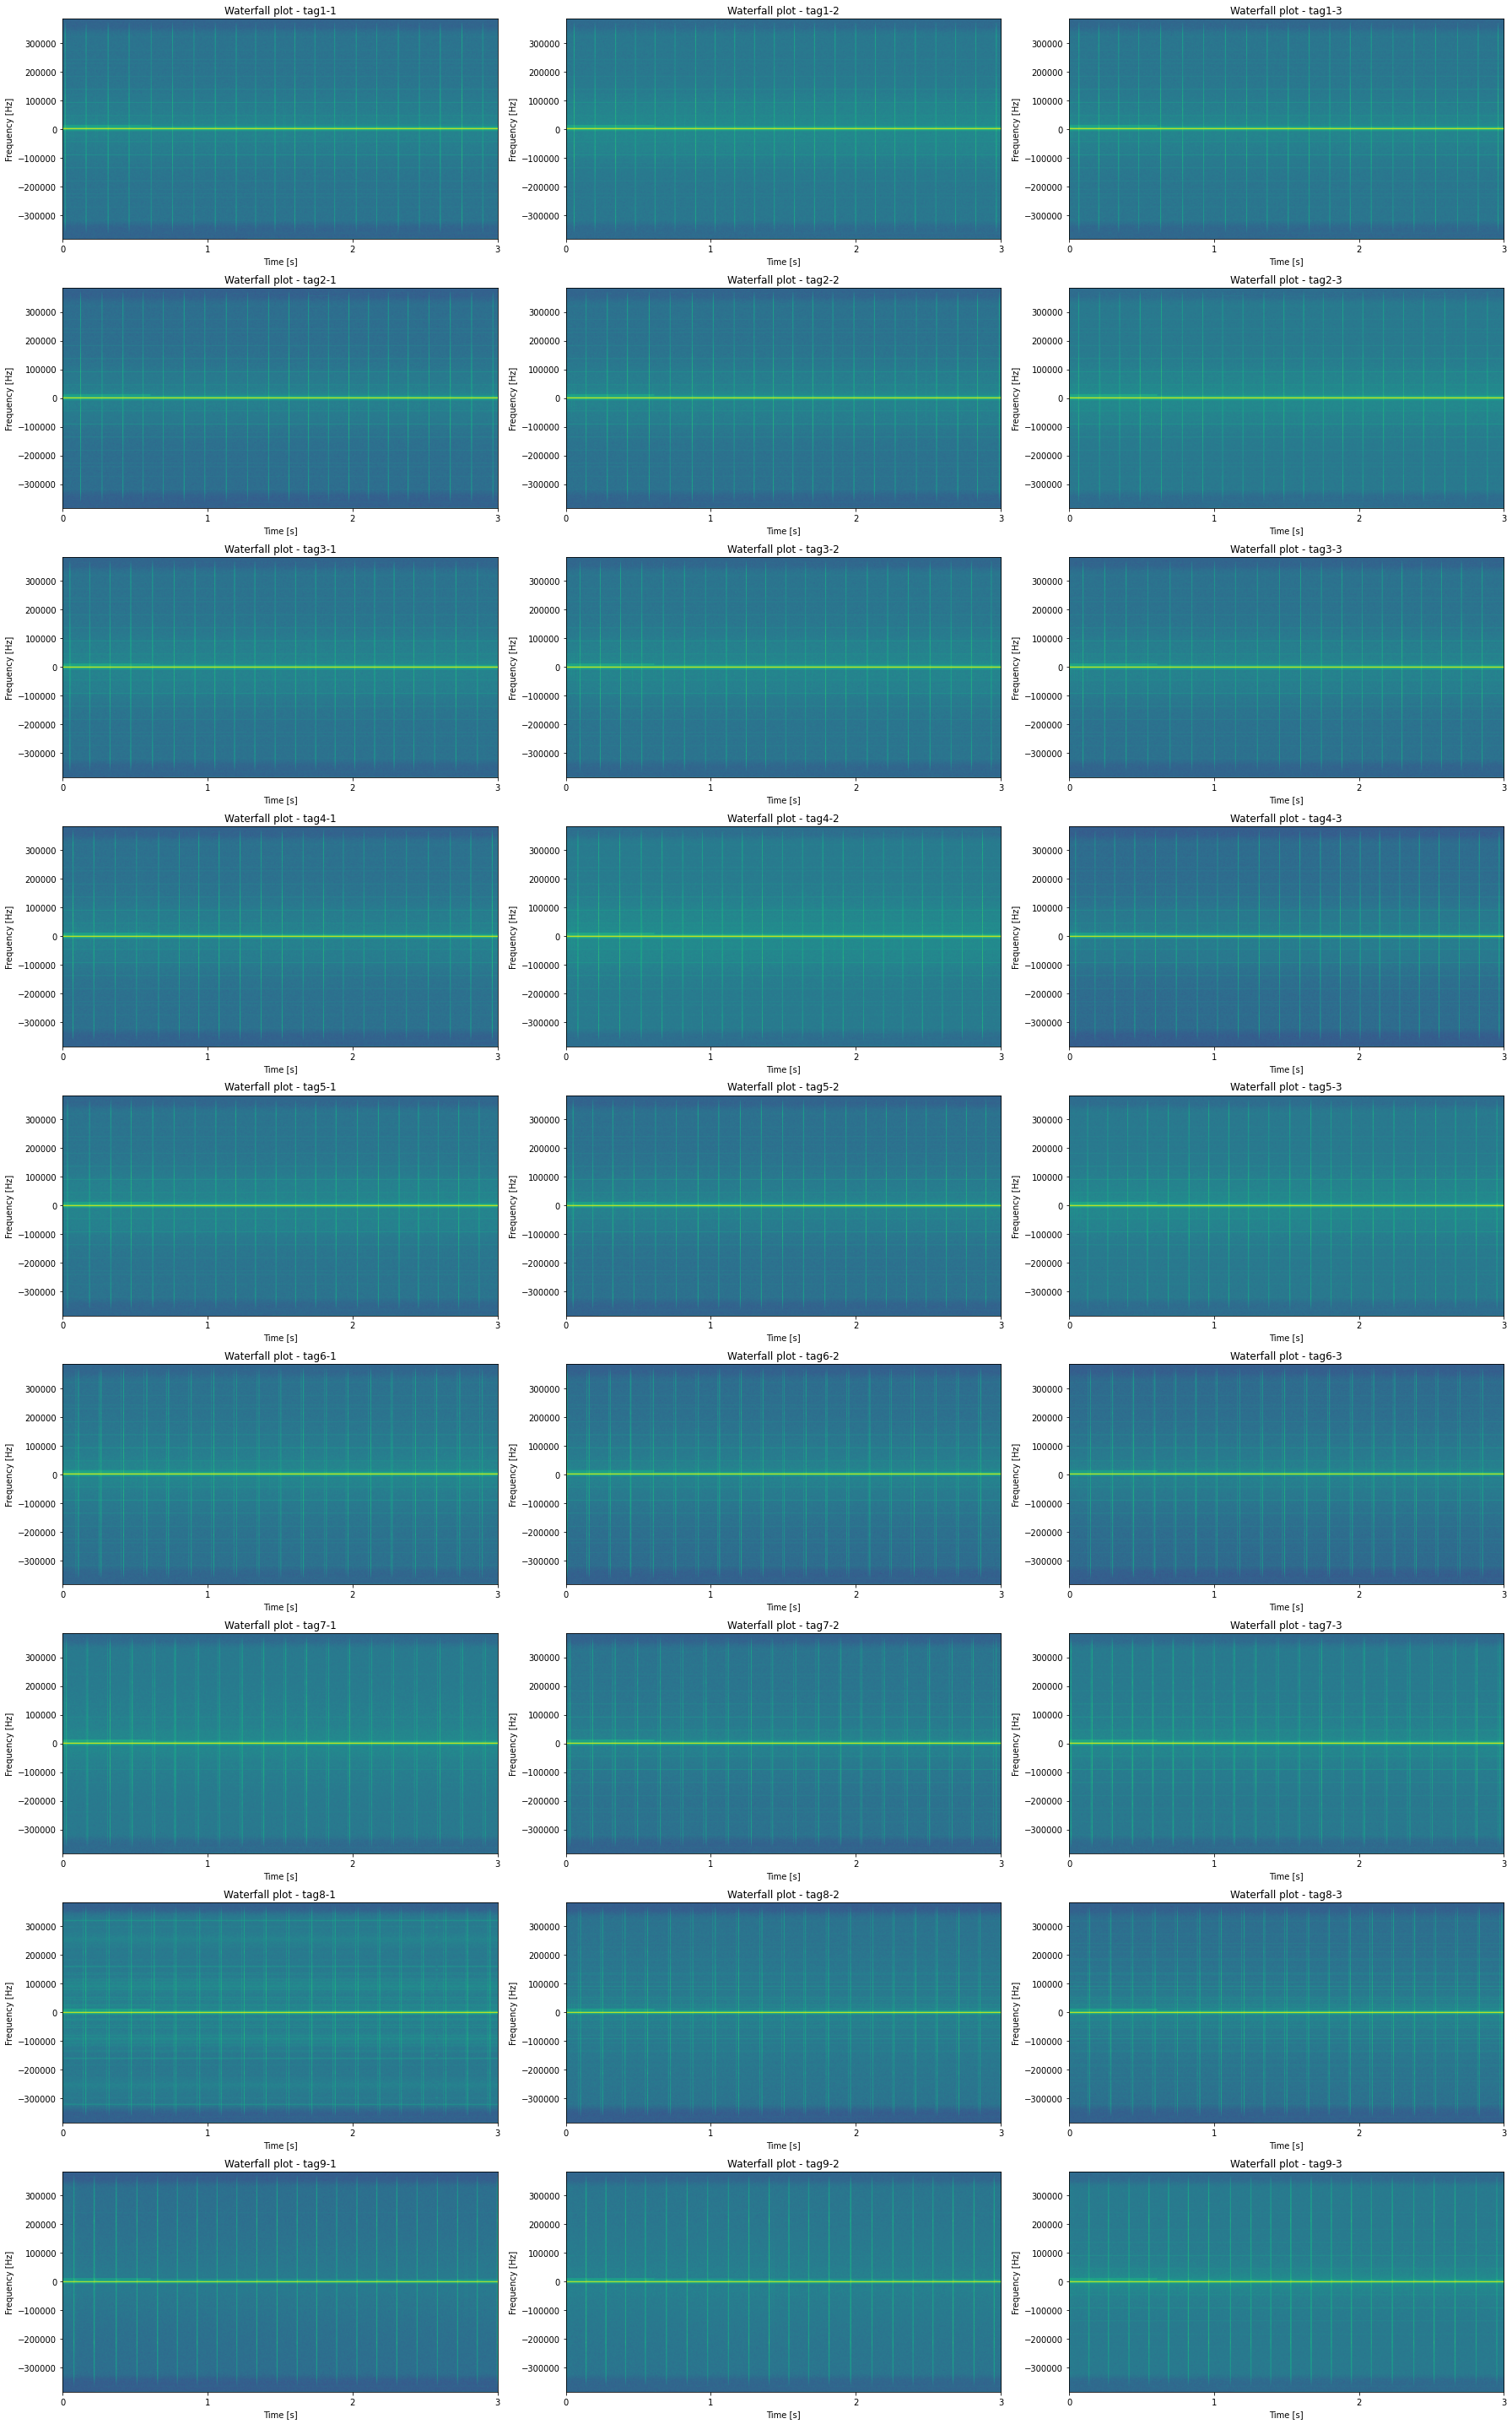

In [6]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.specgram(signal[1], NFFT=NFFT, Fs=SAMP_RATE)
    ax.set_title("Waterfall plot - {}".format(signal[0]))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Frequency [Hz]")
    ax.set_xticks(range(0, 4))

plt.tight_layout()
plt.show()

## PSDs

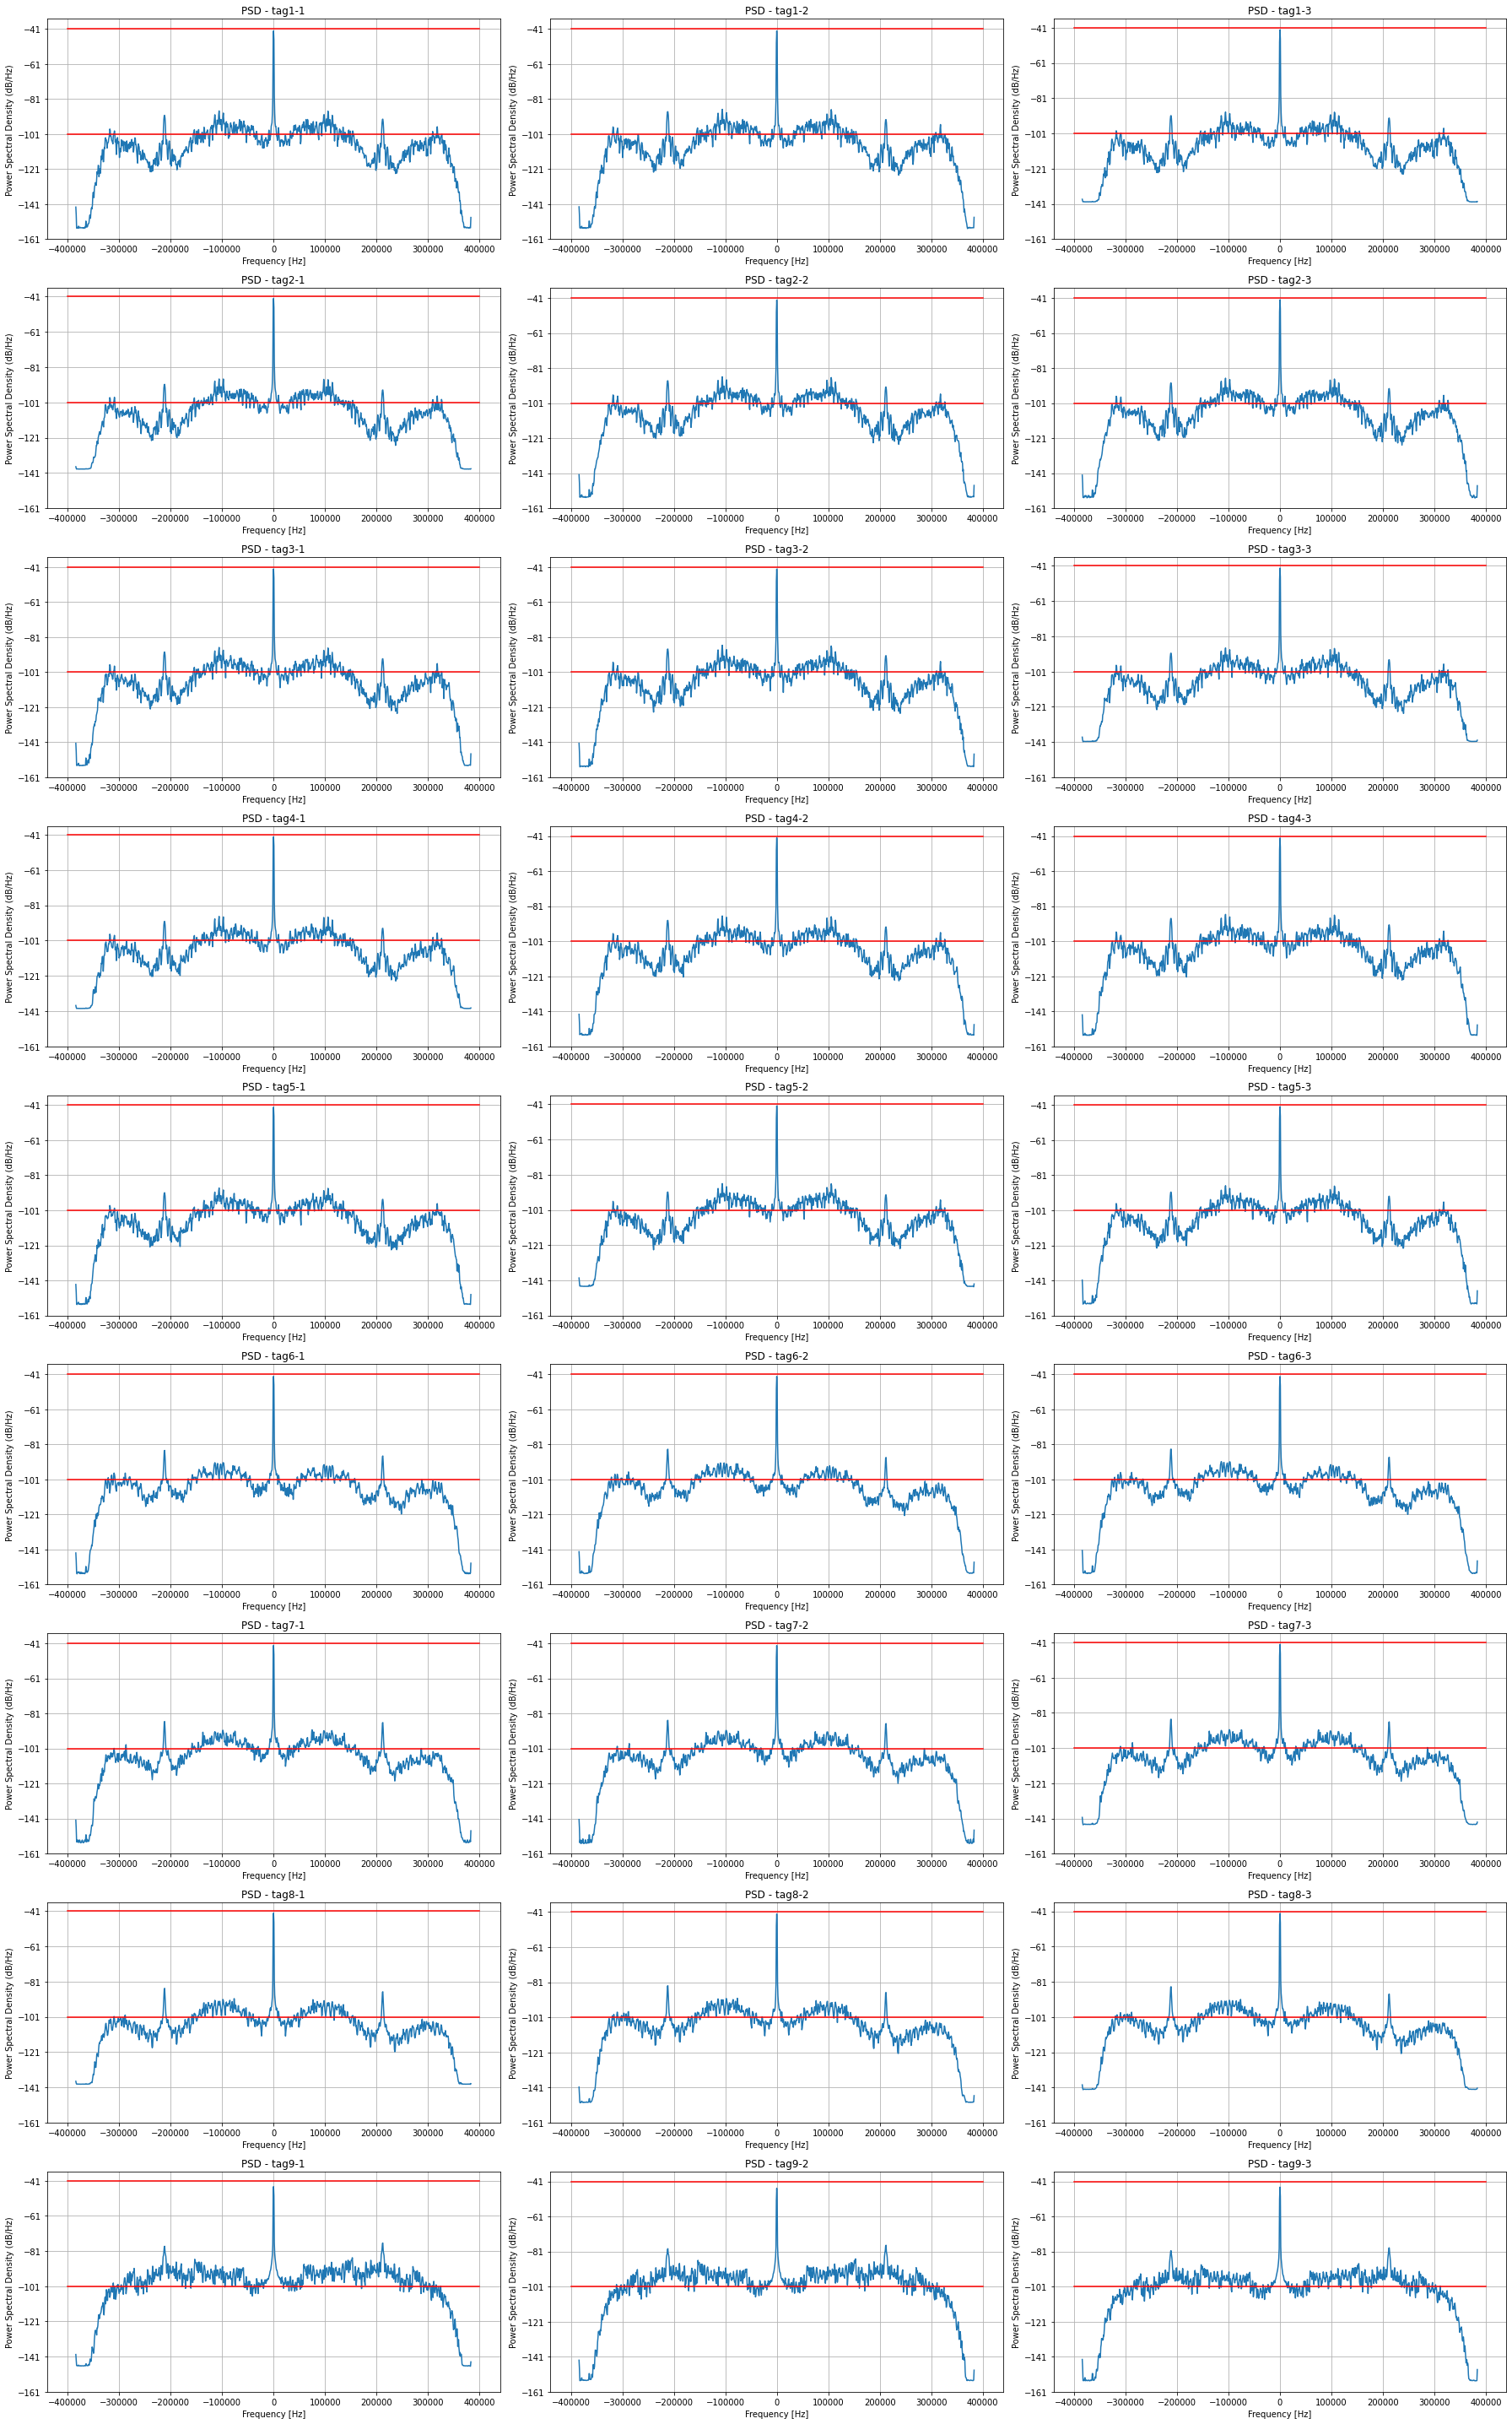

In [121]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.psd(signal[1], NFFT=NFFT, Fs=SAMP_RATE)
    ax.plot([-400000, 400000], [-41, -41], 'r-')
    ax.plot([-400000, 400000], [-101, -101], 'r-')
    ax.set_yticks(range(-161, -21, 20))
    ax.set_xlabel("Frequency [Hz]")
    ax.set_title("PSD - {}".format(signal[0]))

plt.tight_layout()
plt.show()

## Extract of magnitudes

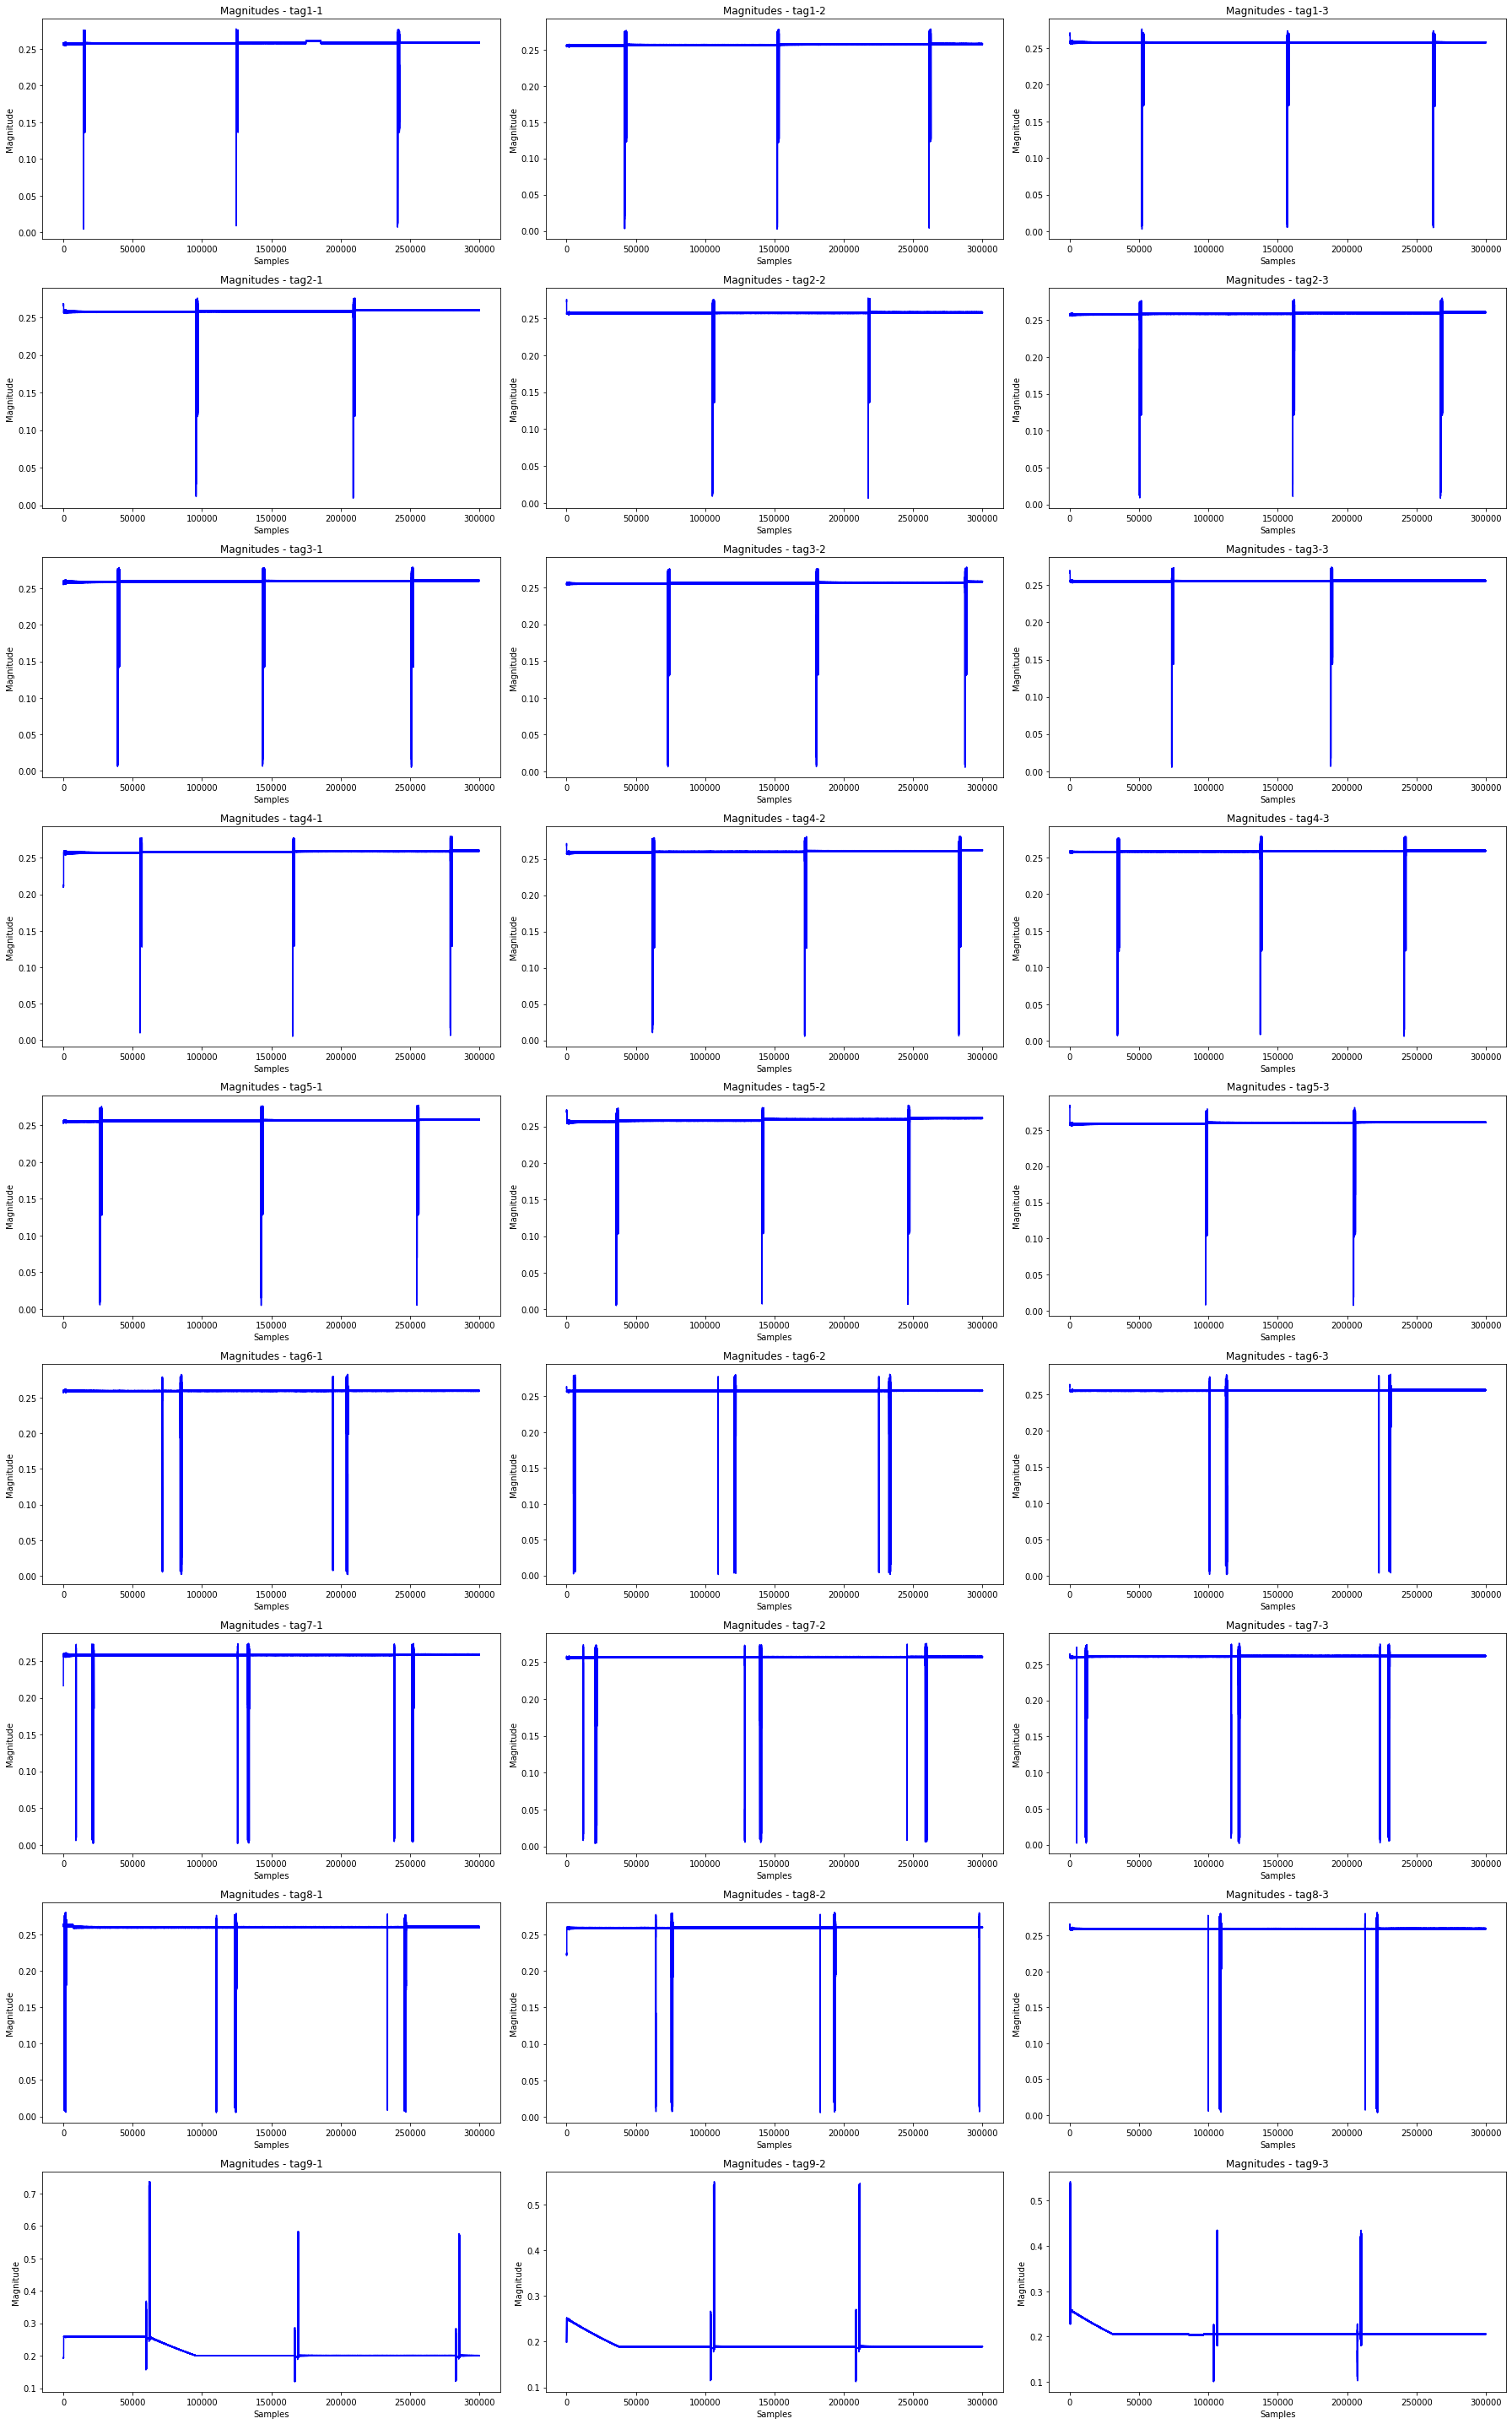

In [30]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    ax.plot(np.abs(signal[1][0:300000]), 'b-')
    ax.set_xlabel("Samples")
    ax.set_ylabel("Magnitude")
    ax.set_title("Magnitudes - {}".format(signal[0]))

plt.tight_layout()
plt.show()

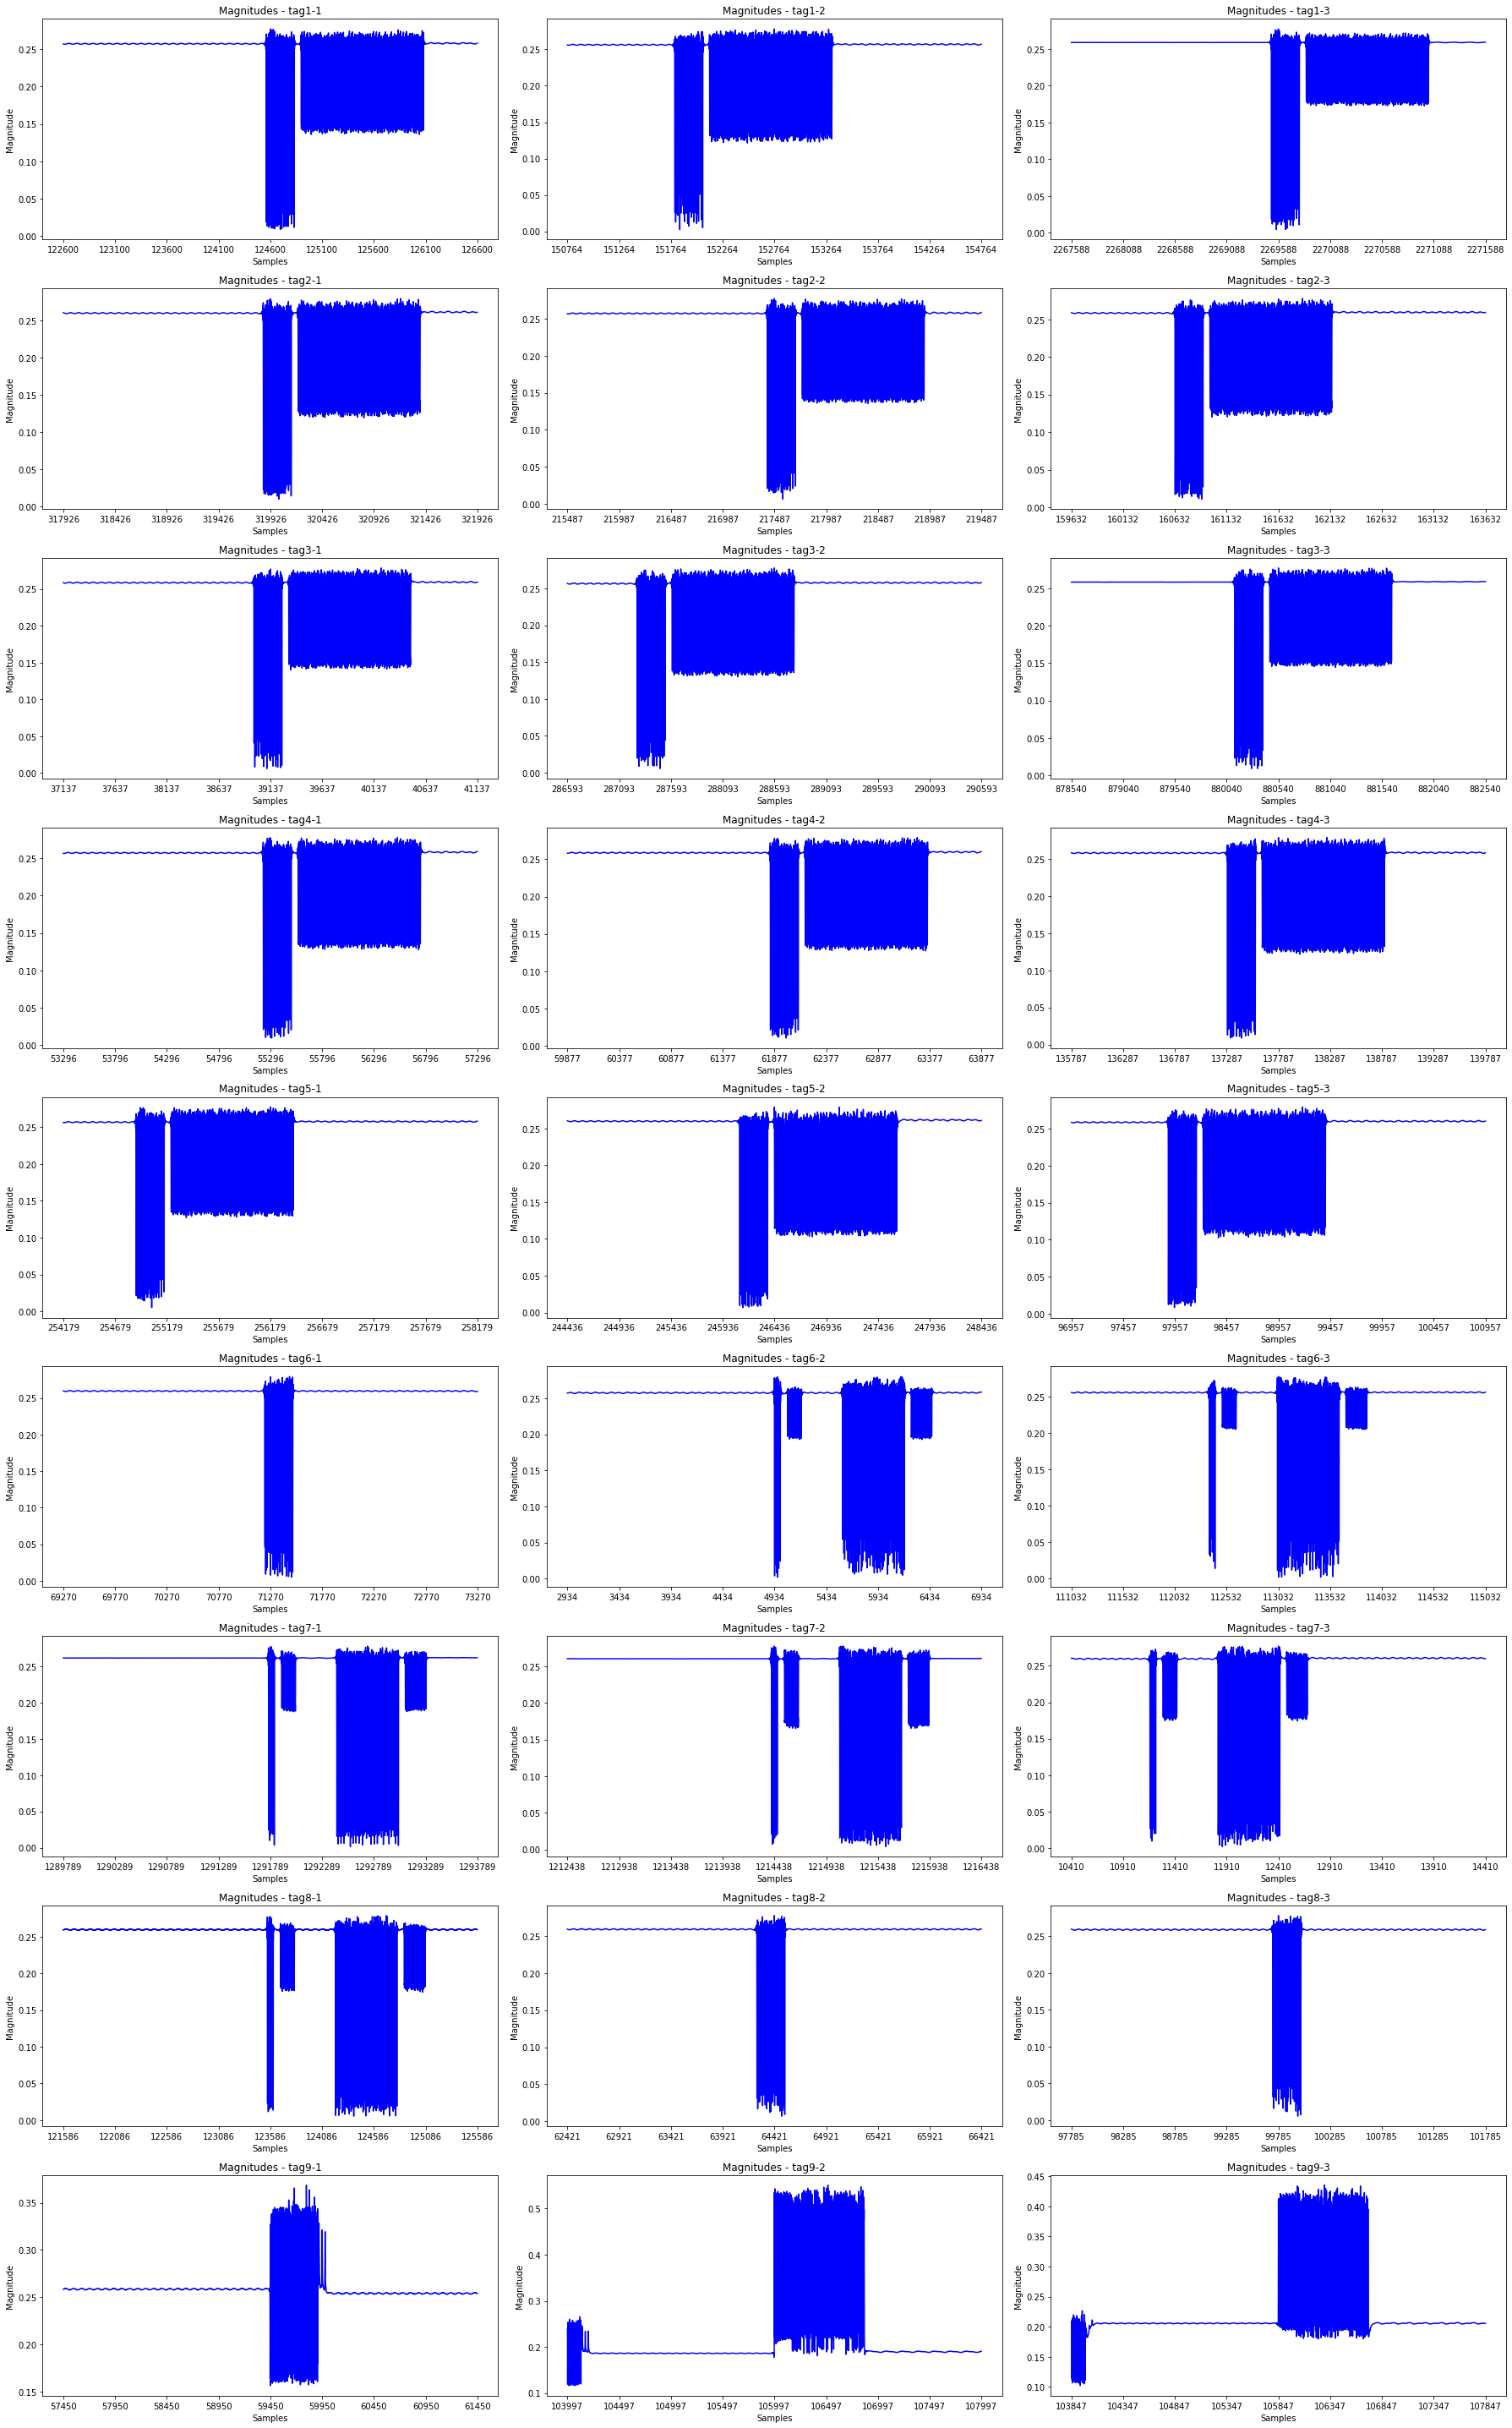

In [25]:
fig, axs = plt.subplots(len(signals) // 3, 3, figsize=(25, 40))

for signal, ax in (t for t in zip(signals, axs.flat)):
    mags = np.abs(signal[1])
    first_peak = sig.find_peaks(mags[2000:], height=0.277)[0][0] + 2000
    
    ax.plot(mags[first_peak-2000:first_peak+2000], 'b-')
    
    ax.set_xticklabels(range(first_peak - 2500, first_peak + 2001, 500))
    ax.set_xlabel("Samples")
    ax.set_ylabel("Magnitude")
    ax.set_title("Magnitudes - {}".format(signal[0]))

plt.tight_layout()
plt.show()